<a href="https://colab.research.google.com/github/biangomes/Portfolio/blob/main/(MELHORAR)_Clustering_KMeans_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Spotify

In [1]:
# Importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importando skicitlearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Permitindo que todas as colunas sejam visualizadas
pd.options.display.max_columns = None

# Renderizando todos os gráficos no formato do notebook
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Importando os dados
df = pd.read_csv("https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/df_spotify.csv")

In [3]:
# Verificando as dimensões
print('Dimensões do dataset')
print('\nVariáveis: ', df.shape[1])
print('\nEntradas: ', df.shape[0])

# Visualizando as primeiras entradas
df.head()

Dimensões do dataset

Variáveis:  17

Entradas:  300


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [4]:
# Selecionando as features numéricas
df_num = pd.DataFrame(df.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].values)

# Salvando o nome das colunas, pois o sklearn as perde
df_col = df.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].columns

# Deixando os dados na mesma escala
scaler = MinMaxScaler()

# Salvando os dados padronizados em um DF chamado scaled
scaled = pd.DataFrame(scaler.fit_transform(df_num))

# Recuperando os nomes das colunas
scaled.columns = df_col

In [5]:
# Visualizando o dataframe scaled
scaled.head(10)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75
5,0.84,0.800578,0.661663,0.545455,0.536337,0.0,0.112259,0.133055,0.000000,0.077338,0.988993,0.821982,0.052555,0.75
6,0.84,0.900289,0.842956,0.545455,0.861292,1.0,0.146686,0.469175,0.000122,0.038513,0.994496,0.657870,0.015685,0.75
7,0.83,0.537572,0.884527,0.363636,0.752870,0.0,0.209394,0.478398,0.000000,0.335617,0.694001,0.405075,0.135542,0.75
8,0.83,0.810694,0.714781,0.090909,0.793086,1.0,0.065413,0.390269,0.000501,0.000000,0.599340,0.659008,0.097160,0.75
9,0.83,0.325145,0.847575,0.181818,0.772792,1.0,0.085577,0.499918,0.000000,0.200664,0.536599,0.626264,0.100567,0.75


Aplicação do KMeans em si.

In [6]:
# Lista que recebe os erros do calculo
wcss = [] 

# Iterando sobre os clusters
for i in range(1, 15):
  # Calculando kmeans
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # Fit no modelo
  kmeans.fit(df_num)
  # Append na lista
  wcss.append(kmeans.inertia_)

Para visualização do clustering, será plotado um gráfico utilizando Elbow Method.

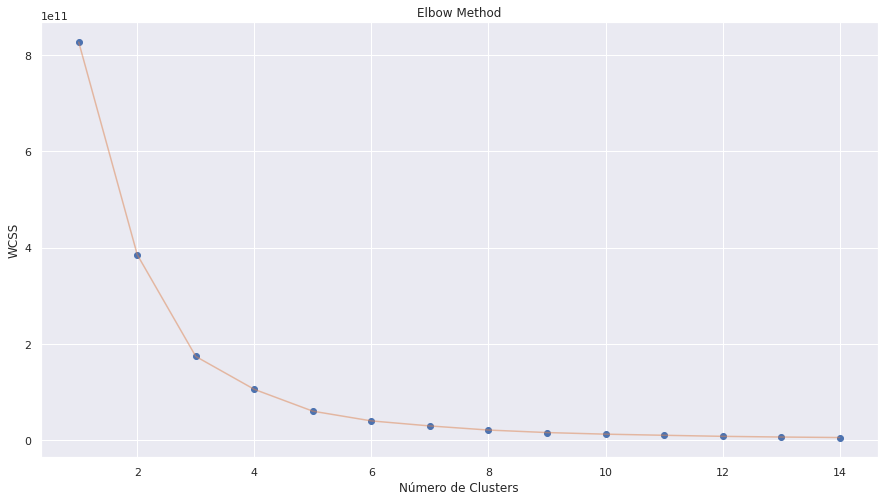

In [7]:
# Visualizacao por Elbow Method
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), wcss, 'o')
plt.plot(range(1, 15), wcss, '-', alpha=0.5)
plt.title("Elbow Method")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

O *Elbow Method* fala de uma curvatura similar a um 'cotovelo', onde o número de *clusters* ficam minimizados.

In [8]:
# Imprimindo a lista wcss, que guardou o erro
print(f'Erro: {wcss}')

Erro: [826385212646.9822, 385089468334.3797, 173871337611.25552, 105580091095.22575, 60242813599.7511, 40079887785.70485, 29618345328.27531, 21111549227.55523, 15891639460.994253, 12560578149.35151, 10243205848.009714, 8048510066.144537, 6618398183.674185, 5561752927.590761]


Calculando a diferença entre os erros (utilizando `numpy`)

In [9]:
dif = np.diff(wcss)
print("Diferenca entre os erros: ", dif)

Diferenca entre os erros:  [-4.41295744e+11 -2.11218131e+11 -6.82912465e+10 -4.53372775e+10
 -2.01629258e+10 -1.04615425e+10 -8.50679610e+09 -5.21990977e+09
 -3.33106131e+09 -2.31737230e+09 -2.19469578e+09 -1.43011188e+09
 -1.05664526e+09]


Instanciando o modelo de novo utilizando **6** clusters.

In [10]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled)

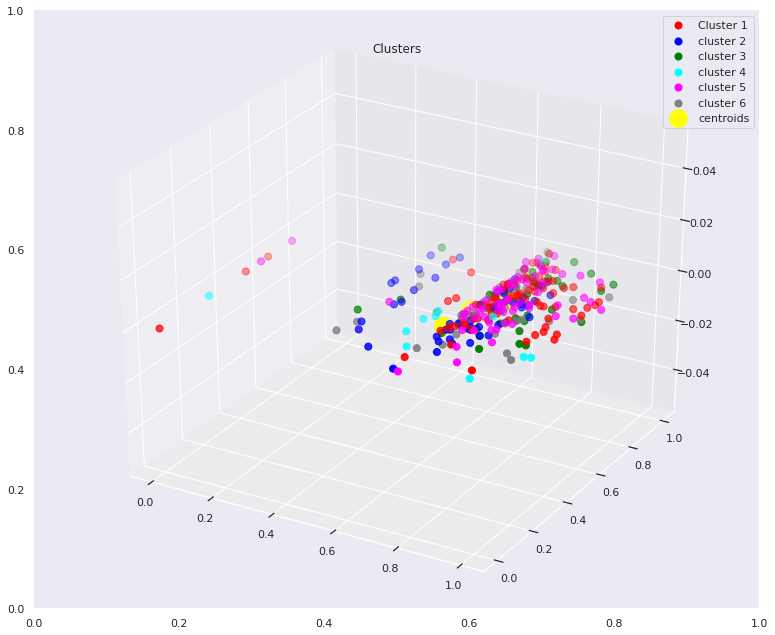

In [11]:
# Visualizando os clusters
fig, ax = plt.subplots(figsize=(13, 11))
scaled = scaler.fit_transform(df_num)

# Definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')

# Plotando os clusters
plt.scatter(scaled[y_kmeans==0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans==1,0], scaled[y_kmeans==1,1], s=50, c='blue', label='cluster 2')
plt.scatter(scaled[y_kmeans==2,0], scaled[y_kmeans==2,1], s=50, c='green', label='cluster 3')
plt.scatter(scaled[y_kmeans==3,0], scaled[y_kmeans==3,1], s=50, c='cyan', label='cluster 4')
plt.scatter(scaled[y_kmeans==4,0], scaled[y_kmeans==4,1], s=50, c='magenta', label='cluster 5')
plt.scatter(scaled[y_kmeans==5,0], scaled[y_kmeans==5,1], s=50, c='gray', label='cluster 6')

# Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show();

### Gráfico 3-D

In [17]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.4MB/s 


In [24]:
# Get this figure: fig = py.get_figure("https://plotly.com/~biangomes/1/")
# Get this figure's data: data = py.get_figure("https://plotly.com/~biangomes/1/").get_data()
# Add data to this figure: py.plot(Data([Scatter(x=[1, 2], y=[2, 3])]), filename ="Plot 1", fileopt="extend")
# Get y data of first trace: y1 = py.get_figure("https://plotly.com/~biangomes/1/").get_data()[0]["y"]

# Get figure documentation: https://plotly.com/python/get-requests/
# Add data documentation: https://plotly.com/python/file-options/

# If you're using unicode in your file, you may need to specify the encoding.
# You can reproduce this figure in Python with the following code!

# Learn about API authentication here: https://plotly.com/python/getting-started
# Find your api_key here: https://plotly.com/settings/api

from plotly import *
#import plotly.plotly as py
import plotly.express as py
from plotly.graph_objs import *
py.sign_in('username', 'api_key')
trace1 = {
  "meta": {"columnNames": {
      "x": "artist_name", 
      "y": "track_name", 
      "z": "cluster"
    }}, 
  "mode": "markers", 
  "type": "scatter3d", 
  "xsrc": "biangomes:0:fd8012", 
  "x": ["DadÃ¡ BoladÃ£o", "MarÃ­lia MendonÃ§a", "MC Du Black", "Anitta", "Jorge & Mateus", "Felipe Original", "Lexa", "Jorge & Mateus", "Anitta", "ZÃ© Neto & Cristiano", "Ludmilla", "Leo Santana", "Matheus & Kauan", "Pk", "MatuÃª", "MC JottaPÃª", "Luan Santana", "VitÃ£o", "MarÃ­lia MendonÃ§a", "Luan Santana", "ANAVITÃRIA", "MC G15", "Gusttavo Lima", "Guilherme & Benuto", "Giulia Be", "MarÃ­lia MendonÃ§a", "MarÃ­lia MendonÃ§a", "Xand AviÃ£o", "Dj Guuga", "Yasmin Santos", "Matheus & Kauan", "Diego & Victor Hugo", "MC Kevin o Chris", "Atitude 67", "MC Ysa", "ZÃ© Felipe", "Melim", "VitÃ£o", "LuÃ­za & MaurÃ­lio", "IZA", "Gustavo Mioto", "MC Kevin o Chris", "Gusttavo Lima", "Pabllo Vittar", "MC Doni", "Israel & Rodolffo", "Y2K", "MC Kevin o Chris", "Maiara & Maraisa", "Gusttavo Lima", "Diego & Arnaldo", "ZÃ© Neto & Cristiano", "Projota", "Diego & Victor Hugo", "Pixote", "Pabllo Vittar", "Dua Lipa", "Gusttavo Lima", "Shawn Mendes", "MC WM", "Mc Leozin", "Mc Livinho", "Murilo Huff", "Anitta", "Mano Walter", "Maiara & Maraisa", "MarÃ­lia MendonÃ§a", "Wesley SafadÃ£o", "Pedro Sampaio", "Guilherme & Benuto", "Matheus & Kauan", "Tones and I", "MC Kevin o Chris", "MC JottaPÃª", "Selena Gomez", "Dilsinho", "Pineapple StormTv", "Post Malone", "MarÃ­lia MendonÃ§a", "Pk", "MC Kevinho", "Pedro Sampaio", "Billie Eilish", "MC Kevinho", "MarÃ­lia MendonÃ§a", "Sorriso Maroto", "Lil Nas X", "Mc Poze do Rodo", "IZA", "Travis Scott", "WIU", "Hungria Hip Hop", "Orochi", "Felipe AraÃºjo", "Ludmilla", "MEDUZA", "George Henrique & Rodrigo", "Ferrugem", "MarÃ­lia MendonÃ§a", "Pedro Sampaio", "POCAH", "Yasmin Santos", "Vintage Culture", "ZÃ© Neto & Cristiano", "Diego & Victor Hugo", "MarÃ­lia MendonÃ§a", "MC Kevin o Chris", "VitÃ£o", "Lewis Capaldi", "ZÃ© Neto & Cristiano", "MarÃ­lia MendonÃ§a", "Boyzinho o Rei da Bregadeira", "3/4/01", "JoÃ£o Gustavo e Murilo", "Dilsinho", "Vou pro Sereno", "Tropkillaz", "Lagum", "Mc Th", "Ariana Grande", "A Banca Records", "Mc Bola", "DJ Dollynho Da Lapa", "MEDUZA", "VitÃ£o", "MarÃ­lia MendonÃ§a", "Wesley SafadÃ£o", "Pk", "Billie Eilish", "MC Kevin o Chris", "Thiaguinho", "Orochi", "MC WM", "MatuÃª", "Ed Sheeran", "Costa Gold", "RaÃ­ Saia Rodada", "Sam Smith", "LuÃ­sa Sonza", "The Black Eyed Peas", "Humberto & Ronaldo", "blackbear", "Maneiro Na Voz", "Camila Cabello", "Selena Gomez", "MC Kevin o Chris", "MarÃ­lia MendonÃ§a", "Gustavo Mioto", "Gusttavo Lima", "Gloria Groove", "Neo Beats", "Harry Styles", "Tribo da Periferia", "Dj Guuga", "Mc Nando", "MarÃ­lia MendonÃ§a", "Post Malone", "Maiara & Maraisa", "Dennis DJ", "MarÃ­lia MendonÃ§a", "Orochi", "Ed Sheeran", "Pineapple StormTv", "Gusttavo Lima", "Gusttavo Lima", "Gusttavo Lima", "Gusttavo Lima", "Casa Worship", "Gusttavo Lima", "Gusttavo Lima", "Gusttavo Lima", "MEDUZA", "Gusttavo Lima", "Gusttavo Lima", "IZA", "Gusttavo Lima", "Gusttavo Lima", "Gusttavo Lima", "Gusttavo Lima", "Kalli", "POCAH", "MarÃ­lia MendonÃ§a", "Sidoka", "Mc Don Juan", "DJ Felipe Ãnico", "Alok", "Alok", "Henrique & Diego", "Bruno & Marrone", "Pedro Sampaio", "Wesley SafadÃ£o", "Thiaguinho", "ZÃ© Neto & Cristiano", "Sam Smith", "Filipe Ret", "Lil Nas X", "OrgÃ¢nico", "ZÃ© Neto & Cristiano", "Gusttavo Lima", "Dilsinho", "Gloria Groove", "MC Kevin o Chris", "LuÃ­sa Sonza", "DJ DS", "VitÃ£o", "PÃ©ricles", "MC Caverinha", "Regard", "ZÃ© Neto & Cristiano", "Ariana Grande", "ZÃ© Neto & Cristiano", "ZÃ© Neto & Cristiano", "ZÃ© Neto & Cristiano", "ZÃ© Neto & Cristiano", "VitÃ£o", "Lucas Lucco", "DJ Snake", "Guilherme & Benuto", "NGC Daddy", "Fernando & Sorocaba", "Cleber & Cauan", "Alok", "Tribo da Periferia", "Arizona Zervas", "Djonga", "Filipe Ret", "VitÃ£o", "Yasmin Santos", "Aldair Playboy", "Filipe Ret", "ANAVITÃRIA", "Anuel AA", "MarÃ­lia MendonÃ§a", "Ariana Grande", "MC Kevin o Chris", "Ferrugem", "MC Lukkas", "Justin Bieber", "Justin Bieber", "Justin Bieber", "Justin Bieber", "Justin Bieber", "Dubdogz", "Simone & Simaria", "Luccas Carlos", "Altamira", "Midian Lima", "Jonas Esticado", "Sidoka", "Mc Dricka", "SHAED", "Vitor Kley", "Murilo Huff", "MarÃ­lia MendonÃ§a", "MC Kevin o Chris", "Anitta", "MC Kevin o Chris", "Tiago Iorc", "MC Kevin o Chris", "RaÃ­ Saia Rodada", "MC GP", "Turma do Pagode", "VitÃ£o", "Normani", "Lizzo", "KVSH", "Post Malone", "Yasmin Santos", "Pixote", "XamÃ£", "Rubel", "ANAVITÃRIA", "Morada", "Billie Eilish", "True Damage", "Ariana Grande", "Shevchenko e Elloco", "Mc Livinho", "DJ Snake", "Luan Santana", "RaÃ­ Saia Rodada", "Dj Henrique de ferraz", "Os BarÃµes Da Pisadinha", "Billie Eilish", "ANAVITÃRIA", "MC Kevinho", "Ali Gatie", "Katy Perry", "ANAVITÃRIA", "Gloria Groove", "Ludmilla", "ANAVITÃRIA", "3/4/01", "MC Rick", "Ed Sheeran", "Mc AnÃ´nimo", "MC Reizin", "ANAVITÃRIA", "ANAVITÃRIA", "Dennis DJ"], 
  "ysrc": "biangomes:0:5687db", 
  "y": ["Surtada - Remix Brega Funk", "Supera - Ao Vivo", "Gaiola Ã o Troco", "Some que ele vem atrÃ¡s", "Cheirosa - Ao Vivo", "Hit Contagiante", "Chama Ela (feat. Pedro Sampaio)", "TijolÃ£o - Ao Vivo", "Combatchy (feat. MC Rebecca)", "Ferida Curada", "Invocada (ParticipaÃ§Ã£o especial de LÃ©o Santana) - Ao vivo", "Contatinho - Ao Vivo Em SÃ£o Paulo / 2019", "Quarta Cadeira - Ao Vivo", "Quando a vontade bater (ParticipaÃ§Ã£o especial de PK Delas)", "Kenny G", "Sentou e Gostou", "quando a bad bater - ao vivo", "Complicado", "Serenata - Ao Vivo", "choque tÃ©rmico - ao vivo", "Pupila", "Ela Vem", "Quem Traiu Levou - Ao Vivo", "3 Batidas - Ao Vivo", "menina solta", "Todo Mundo Vai Sofrer - Ao Vivo", "Bebi Liguei - Ao Vivo", "Algo Mais (Amante) - Ao Vivo", "Vidrado Em VocÃª", "Para, Pensa e Volta - Ao Vivo", "Vou Ter Que Superar - Ao Vivo", "A Culpa Ã© do Meu Grau (feat. ZÃ© Neto & Cristiano) - Ao Vivo em BrasÃ­lia", "Resenha lÃ¡ em casa", "TÃ£o Linda", "Baile da ColÃ´mbia (Brega Funk) - Remix", "Tiro Certo - Ao Vivo", "Gelo", "CafÃ©", "S de Saudade", "Brisa", "Fake News - Ao Vivo", "Evoluiu", "Perrengue - Ao Vivo", "Amor de Que", "Te Amo Sem Compromisso", "TambÃ©m Sei Fazer Falta - Ao Vivo", "Lalala", "Ela Ã do Tipo (feat. Drake) - Remix", "AÃ­ Eu Bebo - Ao Vivo", "Carreira Solo - Ao Vivo", "RelÃ³gio Parado - Ao Vivo", "Estado Decadente - AcÃºstico", "Sei LÃ¡", "Ãudio - Ao Vivo em BrasÃ­lia", "Nem de GraÃ§a / Saudade ArregaÃ§a - Ao Vivo", "ParabÃ©ns", "Don't Start Now", "Milu", "SeÃ±orita", "Para nÃ£o", "Maldita de Ex", "Se Prepara 2", "Dois Enganados", "Onda diferente (feat. Papatinho)", "Fingindo Maturidade - Ao Vivo", "NÃ£o Abro MÃ£o - Ao Vivo", "IntenÃ§Ã£o - Ao Vivo", "Dois Lados", "Vai menina", "Flor Que Se Cheira - Ao Vivo", "MÃ¡gica - Ao Vivo", "Dance Monkey", "Ela Ã do Tipo", "Eterna Sacanagem", "Lose You To Love Me", "Pouco a Pouco (Ao Vivo) (feat. Sorriso Maroto)", "Poesia AcÃºstica #7: CÃ©u Azul", "Circles", "Ciumeira - Ao Vivo", "Do jeito que tu gosta", "Credo que delÃ­cia", "SENTADÃO", "bad guy", "Uma nora pra cada dia", "Apaixonadinha - Ao Vivo", "50 Vezes - Ao Vivo", "Old Town Road - Remix", "To Voando Alto", "Meu talismÃ£", "HIGHEST IN THE ROOM", "MantÃ©m", "Um Pedido", "Acende o Isqueiro", "Hoje Eu Beberei - Felipe AraÃºjo In BrasÃ­lia / Ao Vivo", "Verdinha", "Piece Of Your Heart", "BagunÃ§a Minha Vida - Ao Vivo Em GoiÃ¢nia / 2019", "AtÃ© que enfim - Ao vivo", "BebaÃ§a - Ao Vivo", "Fica Ã  vontade", "NÃ£o sou obrigada", "Saudade em Gotas (feat. Wesley SafadÃ£o) - Ao Vivo", "In The Dark", "Long Neck - AcÃºstico", "Do Copo Eu Vim (feat. MarÃ­lia MendonÃ§a) - Ao Vivo em BrasÃ­lia", "Sem Sal - Ao Vivo", "Morena Cor do Pecado", "Embrasa", "Someone You Loved", "Bebi Minha Bicicleta (CoraÃ§Ã£o Falido) - Ao Vivo", "Obrigado por Estragar Tudo - Ao Vivo", "Trip do Boyzinho", "Memories", "Casa mais feliz da rua - Ao vivo", "Onze e Pouquinho", "Teu Segredo - Ao Vivo", "Bola Rebola", "Oi", "Deixa", "7 rings", "Outro Dia", "Positividade", "Surtada - VersÃ£o Funk", "Piece Of Your Heart - Alok Remix", "Edredom", "Bem Pior Que Eu - Ao Vivo", "Na Cama Que Eu Paguei - Ao Vivo", "IndomÃ¡vel (ParticipaÃ§Ã£o especial de Belo)", "everything i wanted", "Vamos pra Gaiola", "Deixa Tudo Como TÃ¡ - Ao Vivo", "Amor de Fim de Noite", "Senta braba", "Banco", "I Don't Care (with Justin Bieber)", "IrmÃ£o DQbrada!", "Bebe e Vem Me Procurar", "How Do You Sleep?", "Bomba RelÃ³gio", "RITMO (Bad Boys For Life)", "Tchau Obrigado - Ao Vivo", "hot girl bummer", "Botadona", "Liar", "Look At Her Now", "Namorar NÃ£o DÃ¡", "Abandono de Incapaz - Ao Vivo", "Com ou Sem Mim (Ao Vivo em Fortaleza)", "A Gente Fez Amor - Ao Vivo", "MIL GRAU", "Surtada", "Watermelon Sugar", "ConspiraÃ§Ã£o", "7 Dias 7 Corpos", "Garupa 2", "Passa Mal - Ao Vivo", "Goodbyes (feat. Young Thug)", "Nem Tchum - Ao Vivo", "ApimentadÃ­ssima", "Love Ã Queima Roupa - Ao Vivo", "BalÃ£o", "South of the Border (feat. Camila Cabello & Cardi B)", "VocÃª NÃ£o Ama NinguÃ©m", "Contador de Reencontros - Ao Vivo", "Entrevista Com Seu Ex - Ao Vivo", "Vai Viver Sua Vida - Ao Vivo", "Romance no Deserto (Romance in Durango) (feat. Fagner) - Ao Vivo", "A Casa Ã Sua", "Ãltima Letra (Mi Ãltima Letra) - Ao Vivo", "Se Tem Briga, Tem Amor - Ao Vivo", "Chora AtÃ© Perder a Fala - Ao Vivo", "Lose Control", "Milu - Ao Vivo", "Online - Ao Vivo", "Evapora", "Lo Que TÃº y Yo Vivimos (feat. Gente de Zona) - Ao Vivo", "Caquinho - Ao Vivo", "AtÃ© a Garrafa Chora - Ao Vivo", "Eu Vou pra Igreja - Ao Vivo", "Kallidade", "Pode chorar", "Bye Bye - Ao Vivo", "NÃ£o Me Sinto Mal Mais", "Bye Bye", "Mochila nas Costas / Empurra Empurra", "Table For 2", "All The Lies", "Tchau Tchau", "Show De RecaÃ­da - Ao Vivo Em UberlÃ¢ndia / 2018", "Aquecimento do Pedro Sampaio", "Igual Ela SÃ³ Uma", "A Fila Anda - Ao Vivo", "Enchendo e Derramando", "Dancing With A Stranger (with Normani)", "Eu NÃ£o Sou TÃ£o Bom Assim", "Old Town Road", "Baila Mais", "Barzinho AleatÃ³rio - Ao Vivo", "Online", "PÃ©ssimo NegÃ³cio (Ao Vivo)", "YoYo", "Romance Proibido - Ao Vivo", "Garupa", "Quanto Tempo Eu Perdi Com Esse Amor de Bosta", "7 Chamadas", "Supera - Ao Vivo", "Flash", "Ride It", "CondomÃ­nio Fechado - Ao Vivo", "thank u, next", "Por Mais Beijos Ao Vivo (Beijos Ao Vivo)", "TrÃªs OpÃ§Ãµes - Ao Vivo", "Pra Juntar - Ao Vivo", "Beijo de Autoajuda - Ao Vivo", "Te Liguei", "Sumiu do Mapa - Ao Vivo", "Fuego (with Sean Paul & Anitta, feat. Tainy)", "DeclaraÃ§Ã£o pro Bar - Ao Vivo", "Love And Choppa", "AlÃ´ Som (feat. Maiara & Maraisa) - Ao Vivo", "PedaÃ§o Meu - Ao Vivo", "On & On", "Nosso Plano", "ROXANNE", "LEAL", "IlusÃ£o", "Caderninho", "EntÃ£o Vou Avisar - Ao Vivo", "Combate", "SessÃ£o do Descarrego", "relicÃ¡rio", "China", "Casa da MÃ£e Joana - Ao Vivo", "Donât Call Me Angel (Charlieâs Angels) (with Miley Cyrus & Lana Del Rey)", "Um Bom Malandro (VersÃ£o Especial)", "De repente vem vocÃª (ParticipaÃ§Ã£o especial de Belo) - Ao vivo", "Reboladinha", "Mistletoe", "The Christmas Song (Chestnuts Roasting On An Open Fire)", "Christmas Love", "All I Want For Christmas Is You (SuperFestive!)", "Drummer Boy", "Techno Prank", "O Que Ã O Que Ã?", "NADA FÃCIL", "Vem CÃ¡", "NÃ£o Pare", "Vem Me Amar", "Olha Pro Oclin", "Empurra Empurra", "Trampoline (with ZAYN)", "Adrenalizou - Gabriel Boni Remix", "Idiota Favorito", "Amigo Emprestado - Ao Vivo", "Na Onda - Ao Vivo", "Terremoto", "Rola Os Dados - Ao Vivo", "Tangerina - Ao Vivo", "Evoluiu - Ao Vivo", "JÃ¡ Que Me Ensinou a Beber", "Voltei pras putas", "Muito Cedo", "TÃ¡ Foda", "Motivation", "Good as Hell (feat. Ariana Grande) - Remix", "Can't Get Over You", "Take What You Want (feat. Ozzy Osbourne & Travis Scott)", "Sofro Onde Eu Quiser", "Vai Errar de Novo - Ao Vivo", "Monalisa", "Partilhar", "pra vocÃª guardei o amor", "Ã Tudo Sobre VocÃª - Ao Vivo", "bad guy (with Justin Bieber)", "GIANTS", "boyfriend (with Social House)", "NinguÃ©m Fica Parado", "Pilantragem", "Loco Contigo (feat. J. Balvin & Tyga)", "sofrendo feito um louco - ao vivo", "Sentimentos De Vaqueiro (Eu Acho Que NÃ£o)", "Eu JÃ¡ Catuquei", "TÃ¡ Rocheda", "when the party's over", "all star", "Salvou meu dia (ParticipaÃ§Ã£o especial de Gusttavo Lima)", "It's You", "Harleys In Hawaii", "dois rios", "Coisa Boa", "Favela chegou - Ao vivo", "por onde andei", "Happy Christmas (War Is Over) - Bonus Track", "Me Jogou no Lixo", "Beautiful People (feat. Khalid)", "Pagou De Superada", "NÃ£o Tem Como Resistir", "as coisas tÃ£o mais lindas", "espatÃ³dea", "Isso Que Ã© Vida"], 
  "zsrc": "biangomes:0:2805f4", 
  "z": ["0", "1", "0", "5", "4", "0", "4", "5", "2", "2", "1", "0", "5", "4", "4", "4", "2", "0", "1", "1", "4", "4", "4", "1", "0", "2", "1", "1", "2", "2", "1", "1", "4", "4", "0", "1", "2", "4", "4", "4", "1", "0", "1", "0", "2", "1", "2", "4", "0", "1", "1", "2", "4", "4", "4", "2", "0", "2", "0", "0", "0", "0", "1", "5", "1", "5", "0", "2", "5", "5", "2", "5", "3", "4", "3", "1", "0", "2", "0", "0", "5", "4", "4", "0", "1", "1", "4", "4", "4", "0", "0", "2", "0", "1", "0", "0", "0", "1", "5", "0", "0", "4", "0", "4", "2", "1", "4", "2", "3", "1", "1", "0", "4", "2", "0", "1", "0", "4", "5", "5", "4", "2", "5", "0", "4", "1", "4", "5", "5", "4", "1", "5", "4", "2", "4", "0", "0", "5", "5", "0", "5", "0", "0", "0", "0", "2", "1", "0", "0", "0", "5", "2", "5", "5", "4", "0", "2", "1", "2", "1", "5", "0", "2", "1", "1", "2", "1", "4", "0", "4", "5", "0", "1", "2", "4", "1", "1", "2", "1", "2", "5", "1", "4", "4", "2", "5", "4", "0", "4", "0", "0", "1", "4", "4", "0", "2", "0", "1", "2", "1", "4", "0", "0", "2", "4", "0", "3", "2", "1", "2", "1", "5", "1", "1", "0", "1", "4", "5", "4", "1", "1", "0", "0", "0", "0", "5", "5", "1", "0", "5", "3", "4", "5", "2", "4", "1", "2", "0", "0", "4", "0", "4", "2", "4", "5", "4", "2", "5", "0", "5", "0", "4", "4", "1", "1", "0", "5", "0", "5", "4", "0", "1", "4", "2", "5", "0", "5", "4", "5", "5", "4", "3", "0", "2", "2", "0", "0", "2", "4", "0", "2", "5", "0", "3", "5", "0", "0", "0", "0", "4", "5", "3", "3", "4", "0", "5", "5", "3", "3", "4"]
}
data = Data([trace1])
layout = {
  "scene": {
    "camera": {
      "up": {
        "x": 0, 
        "y": 0, 
        "z": 1
      }, 
      "eye": {
        "x": -0.31528983323037835, 
        "y": -0.28845112115752597, 
        "z": 0.8004298867025587
      }, 
      "center": {
        "x": 0, 
        "y": 0, 
        "z": 0
      }, 
      "projection": {"type": "perspective"}
    }, 
    "dragmode": "turntable", 
    "aspectmode": "auto", 
    "aspectratio": {
      "x": 0.7094756547606031, 
      "y": 1.4094916341243984, 
      "z": 1
    }
  }, 
  "xaxis": {
    "range": [-1, 6], 
    "autorange": True
  }, 
  "yaxis": {
    "range": [-1, 4], 
    "autorange": True
  }, 
  "autosize": True, 
  "dragmode": "zoom", 
  "template": {
    "data": {
      "bar": [
        {
          "type": "bar", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "table": [
        {
          "type": "table", 
          "cells": {
            "fill": {"color": "#EBF0F8"}, 
            "line": {"color": "white"}
          }, 
          "header": {
            "fill": {"color": "#C8D4E3"}, 
            "line": {"color": "white"}
          }
        }
      ], 
      "carpet": [
        {
          "type": "carpet", 
          "aaxis": {
            "gridcolor": "#C8D4E3", 
            "linecolor": "#C8D4E3", 
            "endlinecolor": "#2a3f5f", 
            "minorgridcolor": "#C8D4E3", 
            "startlinecolor": "#2a3f5f"
          }, 
          "baxis": {
            "gridcolor": "#C8D4E3", 
            "linecolor": "#C8D4E3", 
            "endlinecolor": "#2a3f5f", 
            "minorgridcolor": "#C8D4E3", 
            "startlinecolor": "#2a3f5f"
          }
        }
      ], 
      "mesh3d": [
        {
          "type": "mesh3d", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }
        }
      ], 
      "contour": [
        {
          "type": "contour", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }, 
          "autocolorscale": True
        }
      ], 
      "heatmap": [
        {
          "type": "heatmap", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }, 
          "autocolorscale": True
        }
      ], 
      "scatter": [
        {
          "type": "scatter", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "surface": [
        {
          "type": "surface", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }
        }
      ], 
      "heatmapgl": [
        {
          "type": "heatmapgl", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }
        }
      ], 
      "histogram": [
        {
          "type": "histogram", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "parcoords": [
        {
          "line": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}, 
          "type": "parcoords"
        }
      ], 
      "scatter3d": [
        {
          "type": "scatter3d", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "scattergl": [
        {
          "type": "scattergl", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "choropleth": [
        {
          "type": "choropleth", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }
        }
      ], 
      "scattergeo": [
        {
          "type": "scattergeo", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "histogram2d": [
        {
          "type": "histogram2d", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }, 
          "autocolorscale": True
        }
      ], 
      "scatterpolar": [
        {
          "type": "scatterpolar", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "contourcarpet": [
        {
          "type": "contourcarpet", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }
        }
      ], 
      "scattercarpet": [
        {
          "type": "scattercarpet", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "scattermapbox": [
        {
          "type": "scattermapbox", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "scatterpolargl": [
        {
          "type": "scatterpolargl", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "scatterternary": [
        {
          "type": "scatterternary", 
          "marker": {"colorbar": {
              "ticks": "", 
              "outlinewidth": 0
            }}
        }
      ], 
      "histogram2dcontour": [
        {
          "type": "histogram2dcontour", 
          "colorbar": {
            "ticks": "", 
            "outlinewidth": 0
          }, 
          "autocolorscale": True
        }
      ]
    }, 
    "layout": {
      "geo": {
        "bgcolor": "white", 
        "showland": True, 
        "lakecolor": "white", 
        "landcolor": "white", 
        "showlakes": True, 
        "subunitcolor": "#C8D4E3"
      }, 
      "font": {"color": "#2a3f5f"}, 
      "polar": {
        "bgcolor": "white", 
        "radialaxis": {
          "ticks": "", 
          "gridcolor": "#EBF0F8", 
          "linecolor": "#EBF0F8"
        }, 
        "angularaxis": {
          "ticks": "", 
          "gridcolor": "#EBF0F8", 
          "linecolor": "#EBF0F8"
        }
      }, 
      "scene": {
        "xaxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "gridwidth": 2, 
          "linecolor": "#EBF0F8", 
          "zerolinecolor": "#EBF0F8", 
          "showbackground": True, 
          "backgroundcolor": "white"
        }, 
        "yaxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "gridwidth": 2, 
          "linecolor": "#EBF0F8", 
          "zerolinecolor": "#EBF0F8", 
          "showbackground": True, 
          "backgroundcolor": "white"
        }, 
        "zaxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "gridwidth": 2, 
          "linecolor": "#EBF0F8", 
          "zerolinecolor": "#EBF0F8", 
          "showbackground": True, 
          "backgroundcolor": "white"
        }
      }, 
      "title": {"x": 0.05}, 
      "xaxis": {
        "ticks": "", 
        "gridcolor": "#EBF0F8", 
        "linecolor": "#EBF0F8", 
        "automargin": True, 
        "zerolinecolor": "#EBF0F8", 
        "zerolinewidth": 2
      }, 
      "yaxis": {
        "ticks": "", 
        "gridcolor": "#EBF0F8", 
        "linecolor": "#EBF0F8", 
        "automargin": True, 
        "zerolinecolor": "#EBF0F8", 
        "zerolinewidth": 2
      }, 
      "ternary": {
        "aaxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "linecolor": "#A2B1C6"
        }, 
        "baxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "linecolor": "#A2B1C6"
        }, 
        "caxis": {
          "ticks": "", 
          "gridcolor": "#DFE8F3", 
          "linecolor": "#A2B1C6"
        }, 
        "bgcolor": "white"
      }, 
      "colorway": ["#636efa", "#EF553B", "#00cc96", "#ab63fa", "#19d3f3", "#e763fa", "#fecb52", "#ffa15a", "#ff6692", "#b6e880"], 
      "hovermode": "closest", 
      "colorscale": {
        "diverging": [
          [0, "#8e0152"], [0.1, "#c51b7d"], [0.2, "#de77ae"], [0.3, "#f1b6da"], [0.4, "#fde0ef"], [0.5, "#f7f7f7"], [0.6, "#e6f5d0"], [0.7, "#b8e186"], [0.8, "#7fbc41"], [0.9, "#4d9221"], [1, "#276419"]], 
        "sequential": [
          [0, "#0508b8"], [0.0893854748603352, "#1910d8"], [0.1787709497206704, "#3c19f0"], [0.2681564245810056, "#6b1cfb"], [0.3575418994413408, "#981cfd"], [0.44692737430167595, "#bf1cfd"], [0.5363128491620112, "#dd2bfd"], [0.6256983240223464, "#f246fe"], [0.7150837988826816, "#fc67fd"], [0.8044692737430168, "#fe88fc"], [0.8938547486033519, "#fea5fd"], [0.9832402234636871, "#febefe"], [1, "#fec3fe"]], 
        "sequentialminus": [
          [0, "#0508b8"], [0.0893854748603352, "#1910d8"], [0.1787709497206704, "#3c19f0"], [0.2681564245810056, "#6b1cfb"], [0.3575418994413408, "#981cfd"], [0.44692737430167595, "#bf1cfd"], [0.5363128491620112, "#dd2bfd"], [0.6256983240223464, "#f246fe"], [0.7150837988826816, "#fc67fd"], [0.8044692737430168, "#fe88fc"], [0.8938547486033519, "#fea5fd"], [0.9832402234636871, "#febefe"], [1, "#fec3fe"]]
      }, 
      "plot_bgcolor": "white", 
      "paper_bgcolor": "white", 
      "shapedefaults": {
        "line": {"width": 0}, 
        "opacity": 0.4, 
        "fillcolor": "#506784"
      }, 
      "annotationdefaults": {
        "arrowhead": 0, 
        "arrowcolor": "#506784", 
        "arrowwidth": 1
      }
    }, 
    "themeRef": "PLOTLY_WHITE"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

AttributeError: ignored

---

### Visualizando as previsões.

In [ ]:
y_kmeans

array([0, 1, 0, 5, 4, 0, 4, 5, 2, 2, 1, 0, 5, 4, 4, 4, 2, 0, 1, 1, 4, 4,
       4, 1, 0, 2, 1, 1, 2, 2, 1, 1, 4, 4, 0, 1, 2, 4, 4, 4, 1, 0, 1, 0,
       2, 1, 2, 4, 0, 1, 1, 2, 4, 4, 4, 2, 0, 2, 0, 0, 0, 0, 1, 5, 1, 5,
       0, 2, 5, 5, 2, 5, 3, 4, 3, 1, 0, 2, 0, 0, 5, 4, 4, 0, 1, 1, 4, 4,
       4, 0, 0, 2, 0, 1, 0, 0, 0, 1, 5, 0, 0, 4, 0, 4, 2, 1, 4, 2, 3, 1,
       1, 0, 4, 2, 0, 1, 0, 4, 5, 5, 4, 2, 5, 0, 4, 1, 4, 5, 5, 4, 1, 5,
       4, 2, 4, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 2, 1, 0, 0, 0, 5, 2, 5, 5,
       4, 0, 2, 1, 2, 1, 5, 0, 2, 1, 1, 2, 1, 4, 0, 4, 5, 0, 1, 2, 4, 1,
       1, 2, 1, 2, 5, 1, 4, 4, 2, 5, 4, 0, 4, 0, 0, 1, 4, 4, 0, 2, 0, 1,
       2, 1, 4, 0, 0, 2, 4, 0, 3, 2, 1, 2, 1, 5, 1, 1, 0, 1, 4, 5, 4, 1,
       1, 0, 0, 0, 0, 5, 5, 1, 0, 5, 3, 4, 5, 2, 4, 1, 2, 0, 0, 4, 0, 4,
       2, 4, 5, 4, 2, 5, 0, 5, 0, 4, 4, 1, 1, 0, 5, 0, 5, 4, 0, 1, 4, 2,
       5, 0, 5, 4, 5, 5, 4, 3, 0, 2, 2, 0, 0, 2, 4, 0, 2, 5, 0, 3, 5, 0,
       0, 0, 0, 4, 5, 3, 3, 4, 0, 5, 5, 3, 3, 4], d

In [ ]:
# convertendo as previsoes para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns=['cluster']

# previsoes como um df
print(kmeans.shape)
kmeans.head

(300, 1)


<bound method NDFrame.head of      cluster
0          0
1          1
2          0
3          5
4          4
..       ...
295        5
296        5
297        3
298        3
299        4

[300 rows x 1 columns]>

In [ ]:
# Concatenando os dataframes
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,0
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,1
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,0
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,5
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,4


In [ ]:
# checando os valores nulos
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

cluster             0.0
time_signature      0.0
track_name          0.0
track_id            0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
artist_name         0.0
dtype: float64

In [ ]:
# Média de popularidade por cluster. Assim posso ver em quais cluster, as musicas mais famosas estao
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    76.111111
0    73.975000
4    73.421875
5    72.434783
1    67.888889
3    67.090909
Name: popularity, dtype: float64

In [ ]:
# conferindo o número música por cluster
df['cluster'].value_counts()

0    80
4    64
1    54
5    46
2    45
3    11
Name: cluster, dtype: int64

In [ ]:
# checando as musicas no cluster
df.loc[df['cluster'] == 0][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784,4,0
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246,4,0
5,Felipe Original,Hit Contagiante,5dKesZwp6deuhEeW8F1UEi,84,0.819,0.684,6,-7.169,0,0.1190,0.1320,0.000000,0.0942,0.959,170.187,137125,4,0
11,Leo Santana,Contatinho - Ao Vivo Em São Paulo / 2019,4RC2nzqaQygxoVQOVv3XlT,83,0.787,0.934,10,-5.136,0,0.0773,0.2230,0.000019,0.9510,0.813,152.018,173230,4,0
17,Vitão,Complicado,52vPpP2gEYaBROIS77J38P,82,0.734,0.484,7,-7.486,0,0.1300,0.5700,0.000000,0.2240,0.499,130.050,179339,4,0
24,Giulia Be,menina solta,2MOq63fxuFLYQM3CsDcFs1,81,0.632,0.559,11,-6.740,0,0.0797,0.3310,0.000000,0.1600,0.673,91.811,150026,4,0
34,MC Ysa,Baile da Colômbia (Brega Funk) - Remix,2qiqXQ2Suc253bR7k9AKVD,79,0.838,0.568,5,-5.555,0,0.1110,0.4190,0.000000,0.0617,0.939,170.015,124000,4,0
41,MC Kevin o Chris,Evoluiu,0WhDotK0QXigmsrlw0DxKK,78,0.776,0.465,7,-6.368,0,0.4340,0.4660,0.000000,0.3630,0.694,149.829,179644,4,0
43,Pabllo Vittar,Amor de Que,29caulxU0jxucdVIyhSJTc,78,0.737,0.819,11,-5.056,0,0.0446,0.0726,0.000000,0.3600,0.904,139.988,157929,4,0
48,Maiara & Maraisa,Aí Eu Bebo - Ao Vivo,6lK3nCiigk34SGqEjpQoqO,77,0.827,0.683,11,-5.113,0,0.0719,0.4790,0.000000,0.4090,0.850,135.944,173892,4,0


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('Spotify_Cluster.csv')
!cp Spotify_Cluster.csv "drive/My Drive/"